<a href="https://colab.research.google.com/github/Santhoshkumar27/34pro/blob/main/detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
yolo =cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [39]:
!pip install opencv-python

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
classes=[]

with open("./coco.names",'r') as f:
  classes=f.read().splitlines()

In [ ]:
len(classes)

80

In [42]:
image = cv2.imread("./computer-lab.jpg")

blob=cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [43]:
blob.shape

(1, 3, 320, 320)

In [44]:
yolo.setInput(blob)

In [45]:
output_layers_names =yolo.getUnconnectedOutLayersNames()
layerOutput =yolo.forward(output_layers_names)

In [48]:
boxes =[]
confidences=[]
class_ids =[]

for output in layerOutput :
  for detection in output:
    
    score = detection[5:]
    class_id=np.argmax(score)
    confidence=score[class_id]

    if confidence > 0.7:
      

      center_x =int(detection[0]*width)
      center_y=int(detection[0]*height)

      w=int(detection[0]*width)
      h=int(detection[0]*height)

      x=int(center_x-w/2)
      y=int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

NameError: ignored

In [ ]:
len(boxes)

0

In [ ]:
indexes =cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX
colors = np.random.uniform(0,255,size= (len(boxes),3))

In [ ]:
for i in indexes.flatten():
  x,y,w,h =boxes[i]

  label =str(classes[class_ids[i]])
  confi=str(round(confidences[i],2))
  color=colors[i]

  cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
  cv2.putText(image,label+""+confi,(x,y+20),font,2,(255,255,255),2)


AttributeError: ignored

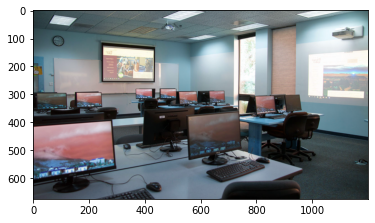

In [ ]:
plt.imshow(image)

In [47]:
width,height=image.size

TypeError: ignored